In [6]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, TimeDistributed
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 1. 数据准备
# 模拟时间序列数据：每个样本是 10 个时间步，每个时间步有 5 个特征
n_samples = 1000
time_steps = 10
n_features = 5
n_classes = 2

In [3]:
# 随机生成数据
X = np.random.rand(n_samples, time_steps, n_features)  # 输入特征
y = np.random.randint(0, n_classes, size=(n_samples,))  # 二分类标签

In [4]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 2. 构建 CNN-LSTM 模型
model = Sequential([
    Input(shape=(time_steps, n_features)),  # 输入层
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # 卷积层
    MaxPooling1D(pool_size=2),  # 最大池化层
    LSTM(50, activation='tanh'),  # LSTM 层
    Dense(1, activation='sigmoid')  # 输出层
])

In [9]:
# 3. 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# 4. 训练模型
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4765 - loss: 0.6945 - val_accuracy: 0.4812 - val_loss: 0.6971
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5226 - loss: 0.6928 - val_accuracy: 0.4812 - val_loss: 0.7004
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 0.6906 - val_accuracy: 0.4812 - val_loss: 0.6989
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5109 - loss: 0.6925 - val_accuracy: 0.4812 - val_loss: 0.6983
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5260 - loss: 0.6901 - val_accuracy: 0.4812 - val_loss: 0.6981
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5406 - loss: 0.6885 - val_accuracy: 0.4688 - val_loss: 0.6961
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5611 - loss: 0.6856 - val_accuracy: 0.4750 - val_loss: 0.6956
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5477 - loss: 0.6881 - val_accuracy: 0.4750 - val_loss

In [11]:
# 5. 测试模型
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test Accuracy: 0.48


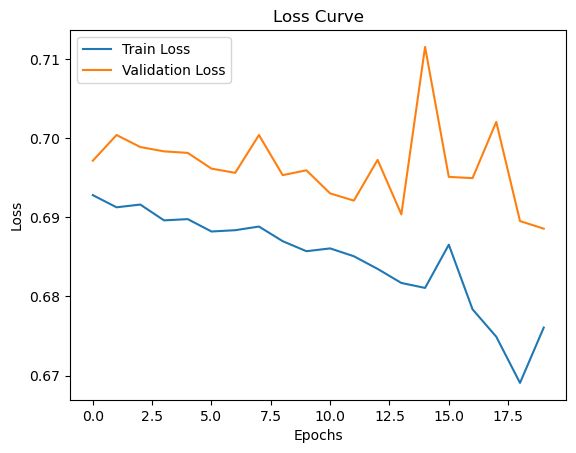

In [12]:
# 6. 可视化训练过程
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()